# Pre-processing and N-grams
Adapted from: https://github.com/datavisiondallas/NLP-Walkthrough/blob/main/reviews.ipynb

## 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns                  # Data visualization library built on top of Matplotlib
!pip install --upgrade pillow
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter

import nltk                            # Popular (and old) open-source library in Python
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


## 2. Load dataset

In [4]:
# Load the dataset
file_path = '/content/sample_data/P4_dataset_friends.csv'
#file_path = 'P4_dataset_friends.csv'
data = pd.read_csv(file_path, delimiter= ";")

# Display the first few rows and the number of lines
print(data.head())
print(len(data))

   category                                               text
0  Chandler  All right Joey, be nice. So does he have a hum...
1  Chandler                          Sounds like a date to me.
2  Chandler  Alright, so I'm back in high school, I'm stand...
3  Chandler  Then I look down, and I realize there's a phon...
4  Chandler                                      That's right.
45481


## 3. Basic statistics

In [5]:
## Lines length analysis
data['text'] = data['text'].fillna('') # if there are missing values (NaNs)
data['characters'] = data['text'].apply(len)

text_characters_summary = data['characters'].describe() # count, mean, std, ...

# Lines length analysis (counting words instead of characters)
data['Word_Count'] = data['text'].apply(lambda x: len(x.split()))
text_words_summary = data['Word_Count'].describe()

# Friends distribution
friends_counts = data['category'].value_counts().sort_index()

# 45481 is the number of lines
print(f'''\n{'-'*60}
Lines length by number of characters\n{text_characters_summary}\n{'-'*60}
Lines length by number of words\n{text_words_summary}\n{'-'*60}
Number of lines for each friend :\n{friends_counts}
''')


------------------------------------------------------------
Lines length by number of characters
count    45481.000000
mean        61.519272
std         64.529927
min          0.000000
25%         20.000000
50%         43.000000
75%         81.000000
max       1326.000000
Name: characters, dtype: float64
------------------------------------------------------------
Lines length by number of words
count    45481.000000
mean        11.791385
std         12.281484
min          0.000000
25%          4.000000
50%          8.000000
75%         16.000000
max        248.000000
Name: Word_Count, dtype: float64
------------------------------------------------------------
Number of lines for each friend :
category
Chandler    7488
Joey        7372
Monica      7516
Phoebe      6699
Rachel      8318
Ross        8088
Name: count, dtype: int64



## 4. Some nice figures

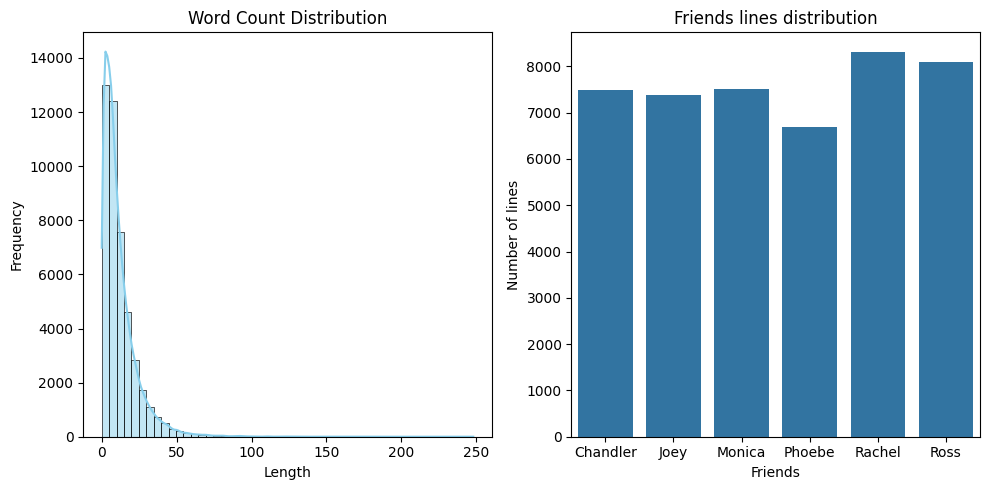

In [6]:
# Plotting the Lines Length Distribution and Characters Distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Lines length distribution (by words)
sns.histplot(data['Word_Count'], bins=50, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Word Count Distribution')
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')

# Friends lines distribution
sns.barplot(x=friends_counts.index, y=friends_counts.values, ax=axes[1])
axes[1].set_title('Friends lines distribution')
axes[1].set_xlabel('Friends')
axes[1].set_ylabel('Number of lines')

plt.tight_layout()
plt.show()


## 5. Which are the most popular words?

### 5.1 Necessary downloads

In [7]:
# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### 5.2 Pre-processing

In [9]:
# Tokenization split review into single words (tokens) <- more sophisticated than before
# data['Tokens'] = data['text'].apply(lambda x: word_tokenize(x.lower()))

# Alternative:
data['Tokens'] = data['text'].apply(lambda x: nltk.wordpunct_tokenize(x.lower()))

# Filter out stop words
stop_words = set(stopwords.words('english'))
# stop_words = ['a', 'the', 'and'] # pick them manually if the previous list is too radical

def filter_tokens(tokens):
    return [word for word in tokens if word.isalpha() and word not in stop_words]
data['Filtered_Tokens'] = data['Tokens'].apply(filter_tokens)

data.head() # Check

,category,text,characters,Word_Count,Tokens,Filtered_Tokens
0,Chandler,"All right Joey, be nice. So does he have a hum...",72,16,"[all, right, joey, ,, be, nice, ., so, does, h...","[right, joey, nice, hump, hump, hairpiece]"
1,Chandler,Sounds like a date to me.,25,6,"[sounds, like, a, date, to, me, .]","[sounds, like, date]"
2,Chandler,"Alright, so I'm back in high school, I'm stand...",115,22,"[alright, ,, so, i, ', m, back, in, high, scho...","[alright, back, high, school, standing, middle..."
3,Chandler,"Then I look down, and I realize there's a phon...",57,11,"[then, i, look, down, ,, and, i, realize, ther...","[look, realize, phone]"
4,Chandler,That's right.,13,2,"[that, ', s, right, .]",[right]


5.3 Finds the most common words/tokens

In [10]:
# Flatten the list of tokens and count the words
all_words = [word for tokens in data['Filtered_Tokens'] for word in tokens]
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(20)

print(most_common_words[:10])

[('oh', 6381), ('know', 5573), ('okay', 4356), ('yeah', 3991), ('hey', 3273), ('well', 3129), ('right', 2856), ('like', 2478), ('gonna', 2266), ('get', 2265)]


/tmp/ipython-input-1667018683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in most_common_words], y=[word for word, count in most_common_words], palette='viridis')


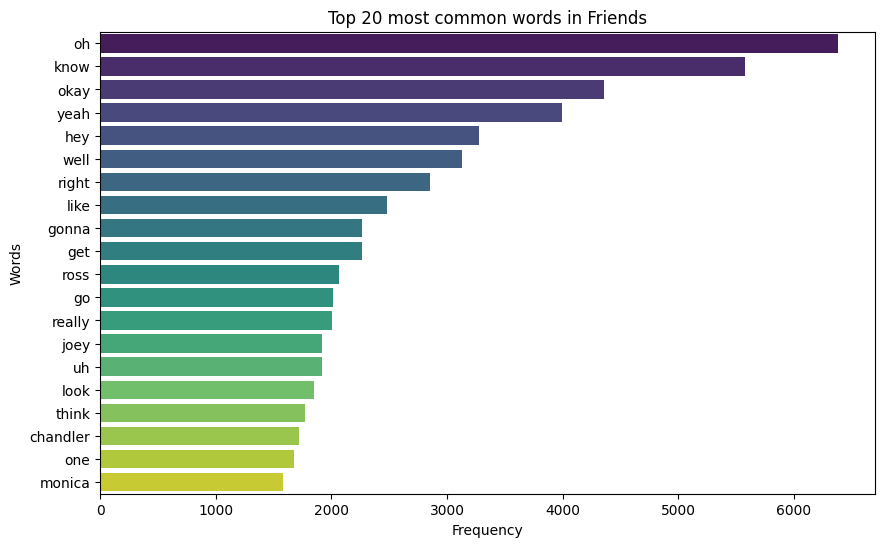

In [11]:
# Plotting the word frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=[count for word, count in most_common_words], y=[word for word, count in most_common_words], palette='viridis')
plt.title('Top 20 most common words in Friends')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

## 6. Maybe we should check expressions and not just words


### 6.1 Generating bigrams and trigrams

In [12]:
# Function to generate and count ngrams
def generate_ngrams(tokens_list, n):
    ngrams_list = ngrams(tokens_list, n)
    ngrams_counts = Counter(ngrams_list)
    return ngrams_counts

# Generating bigrams (2-grams) and trigrams (3-grams)
data['Bigrams'] = data['Filtered_Tokens'].apply(lambda x: generate_ngrams(x, 2))
data['Trigrams'] = data['Filtered_Tokens'].apply(lambda x: generate_ngrams(x, 3))

data.head()

,category,text,characters,Word_Count,Tokens,Filtered_Tokens,Bigrams,Trigrams
0,Chandler,"All right Joey, be nice. So does he have a hum...",72,16,"[all, right, joey, ,, be, nice, ., so, does, h...","[right, joey, nice, hump, hump, hairpiece]","{('right', 'joey'): 1, ('joey', 'nice'): 1, ('...","{('right', 'joey', 'nice'): 1, ('joey', 'nice'..."
1,Chandler,Sounds like a date to me.,25,6,"[sounds, like, a, date, to, me, .]","[sounds, like, date]","{('sounds', 'like'): 1, ('like', 'date'): 1}","{('sounds', 'like', 'date'): 1}"
2,Chandler,"Alright, so I'm back in high school, I'm stand...",115,22,"[alright, ,, so, i, ', m, back, in, high, scho...","[alright, back, high, school, standing, middle...","{('alright', 'back'): 1, ('back', 'high'): 1, ...","{('alright', 'back', 'high'): 1, ('back', 'hig..."
3,Chandler,"Then I look down, and I realize there's a phon...",57,11,"[then, i, look, down, ,, and, i, realize, ther...","[look, realize, phone]","{('look', 'realize'): 1, ('realize', 'phone'): 1}","{('look', 'realize', 'phone'): 1}"
4,Chandler,That's right.,13,2,"[that, ', s, right, .]",[right],{},{}


### 6.2 Counting brigrams and trigrams

In [13]:
# Initialize counters for bigrams and trigrams
bigram_counts = Counter()
trigram_counts = Counter()

# Sum the counts
for bigram_counter in data['Bigrams']:
    bigram_counts.update(bigram_counter)

for trigram_counter in data['Trigrams']:
    trigram_counts.update(trigram_counter)

# Most common bigrams and trigrams
most_common_bigrams = bigram_counts.most_common(20)
most_common_trigrams = trigram_counts.most_common(20)

print(most_common_bigrams)
print(most_common_trigrams)

[(('oh', 'god'), 1034), (('oh', 'yeah'), 394), (('okay', 'okay'), 274), (('oh', 'oh'), 265), (('hey', 'hey'), 234), (('know', 'know'), 225), (('entering', 'hey'), 212), (('yeah', 'yeah'), 202), (('gonna', 'go'), 181), (('well', 'know'), 173), (('yeah', 'know'), 172), (('wait', 'minute'), 170), (('uh', 'huh'), 168), (('oh', 'know'), 165), (('hey', 'guys'), 153), (('whoa', 'whoa'), 147), (('know', 'mean'), 145), (('yeah', 'well'), 145), (('wait', 'wait'), 142), (('oh', 'well'), 138)]
[(('oh', 'god', 'oh'), 68), (('whoa', 'whoa', 'whoa'), 66), (('hey', 'hey', 'hey'), 59), (('wait', 'wait', 'wait'), 51), (('oh', 'oh', 'oh'), 47), (('god', 'oh', 'god'), 46), (('okay', 'okay', 'okay'), 46), (('la', 'la', 'la'), 31), (('entering', 'hey', 'guys'), 29), (('ow', 'ow', 'ow'), 28), (('oh', 'god', 'gonna'), 27), (('look', 'look', 'look'), 27), (('ha', 'ha', 'ha'), 25), (('oh', 'yeah', 'yeah'), 24), (('oh', 'oh', 'god'), 24), (('go', 'go', 'go'), 24), (('know', 'know', 'know'), 23), (('phone', 'hell

### 6.3 Nice Figures

/tmp/ipython-input-4038002553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for bigram, count in most_common_bigrams], y=[' '.join(bigram) for bigram, count in most_common_bigrams], ax=axes[0], palette='viridis')
/tmp/ipython-input-4038002553.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for trigram, count in most_common_trigrams], y=[' '.join(trigram) for trigram, count in most_common_trigrams], ax=axes[1], palette='viridis')


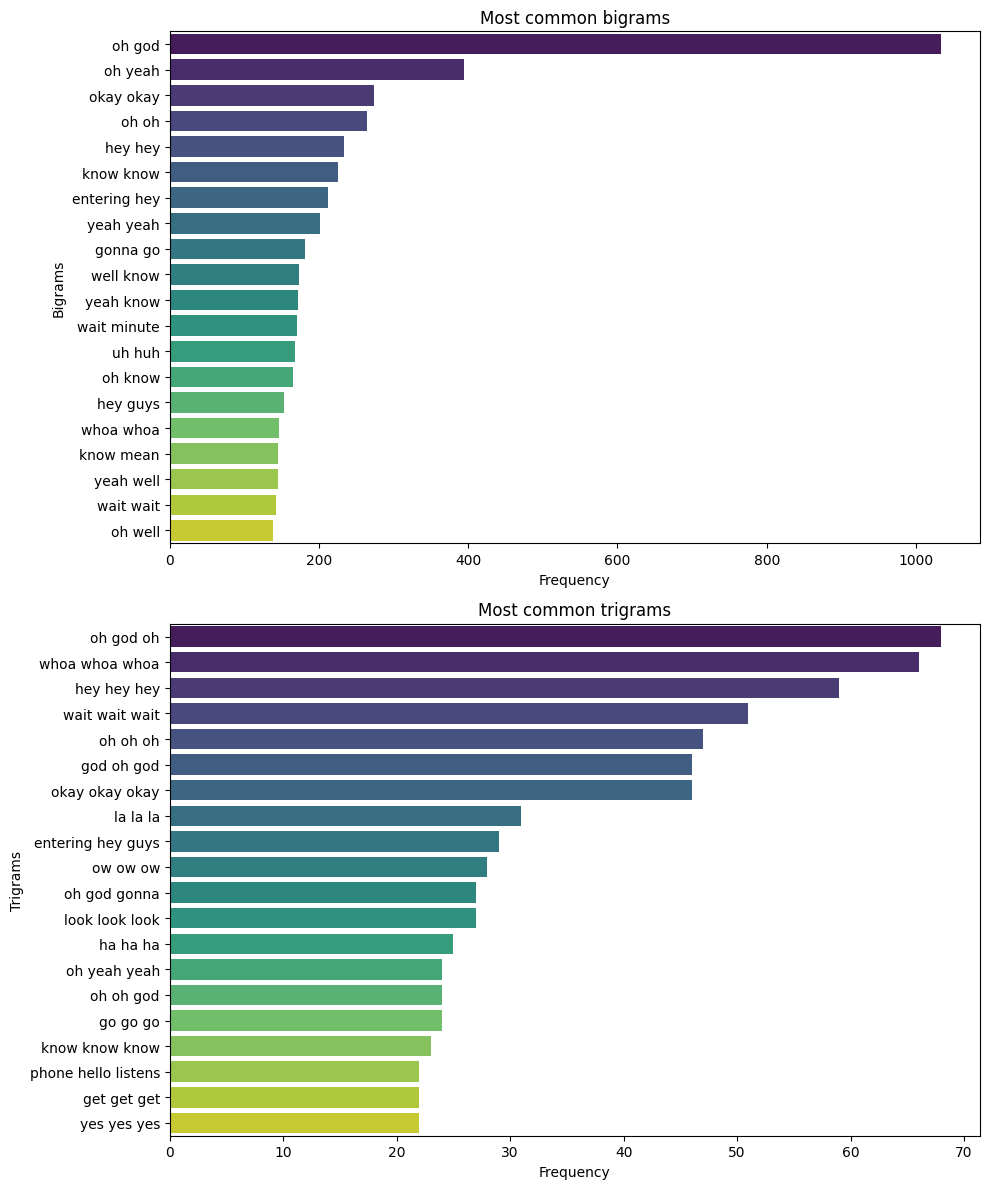

In [14]:
# Plotting the most common bigrams and trigrams
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Bigrams
sns.barplot(x=[count for bigram, count in most_common_bigrams], y=[' '.join(bigram) for bigram, count in most_common_bigrams], ax=axes[0], palette='viridis')
axes[0].set_title('Most common bigrams')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Bigrams')

# Trigrams
sns.barplot(x=[count for trigram, count in most_common_trigrams], y=[' '.join(trigram) for trigram, count in most_common_trigrams], ax=axes[1], palette='viridis')
axes[1].set_title('Most common trigrams')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Trigrams')

plt.tight_layout()
plt.show()


### 6.4 Bigrams and Trigrams by friend

In [15]:
# Function to aggregate and count n-grams for each rating
def aggregate_ngrams_by_friend(data, n):
    ngram_counts_by_friend = {}
    for friend in sorted(data['category'].unique()):
        # Filter lines for the specific friend
        friend_data = data[data['category'] == friend]['Filtered_Tokens']

        # Flatten the list of filtered tokens for the specific friend
        all_filtered_tokens_friend = [token for sublist in friend_data for token in sublist]

        # Generating and counting ngrams for the specific friend
        ngram_counts = generate_ngrams(all_filtered_tokens_friend, n)

        # Most common ngrams for the specific rating
        ngram_counts_by_friend[friend] = ngram_counts.most_common(10)

    return ngram_counts_by_friend

# Aggregating and counting bigrams and trigrams for each rating
bigrams_by_friend = aggregate_ngrams_by_friend(data, 2)
trigrams_by_friend = aggregate_ngrams_by_friend(data, 3)

print(bigrams_by_friend)
print(trigrams_by_friend)


{'Chandler': [(('oh', 'god'), 86), (('oh', 'yeah'), 77), (('okay', 'okay'), 42), (('hey', 'hey'), 32), (('well', 'know'), 31), (('hey', 'know'), 31), (('yeah', 'well'), 30), (('know', 'mean'), 29), (('oh', 'come'), 27), (('gonna', 'get'), 27)], 'Joey': [(('hey', 'hey'), 105), (('yeah', 'yeah'), 87), (('oh', 'yeah'), 78), (('oh', 'god'), 60), (('entering', 'hey'), 60), (('oh', 'oh'), 56), (('whoa', 'whoa'), 53), (('oh', 'hey'), 51), (('hey', 'guys'), 41), (('right', 'right'), 35)], 'Monica': [(('oh', 'god'), 245), (('let', 'go'), 40), (('okay', 'okay'), 38), (('oh', 'yeah'), 31), (('gonna', 'go'), 30), (('wait', 'minute'), 30), (('god', 'oh'), 27), (('hey', 'guys'), 27), (('oh', 'wait'), 24), (('know', 'know'), 23)], 'Phoebe': [(('oh', 'god'), 185), (('oh', 'yeah'), 74), (('uh', 'huh'), 64), (('oh', 'okay'), 58), (('know', 'know'), 51), (('oh', 'oh'), 49), (('yeah', 'know'), 42), (('yeah', 'yeah'), 40), (('okay', 'okay'), 39), (('oh', 'know'), 38)], 'Rachel': [(('oh', 'god'), 337), (('o

### 6.5 And what about a word cloud?

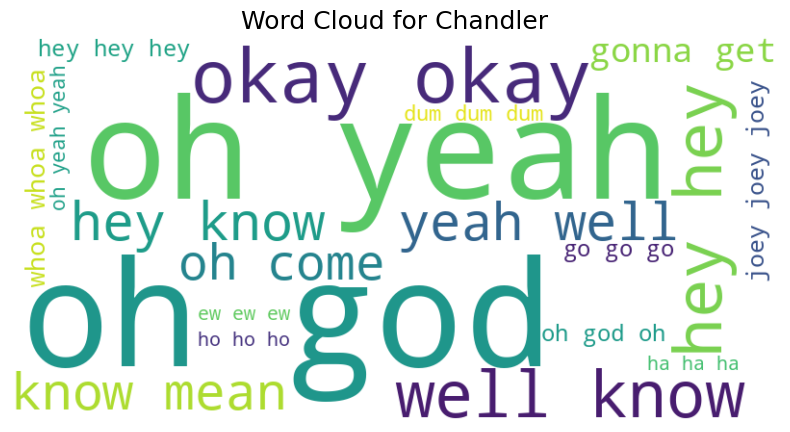

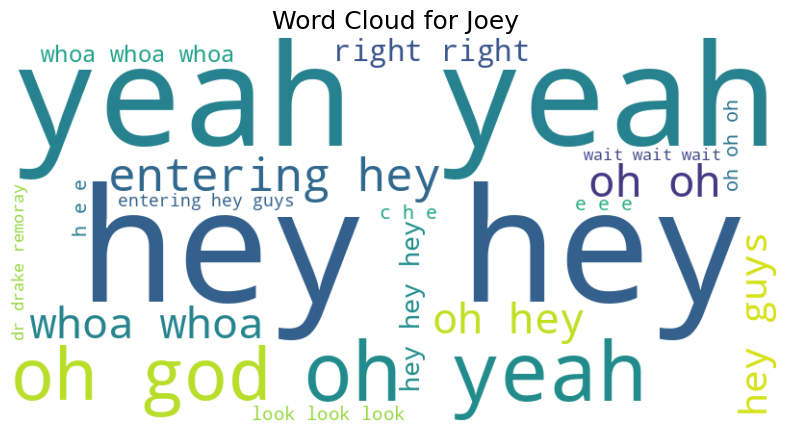

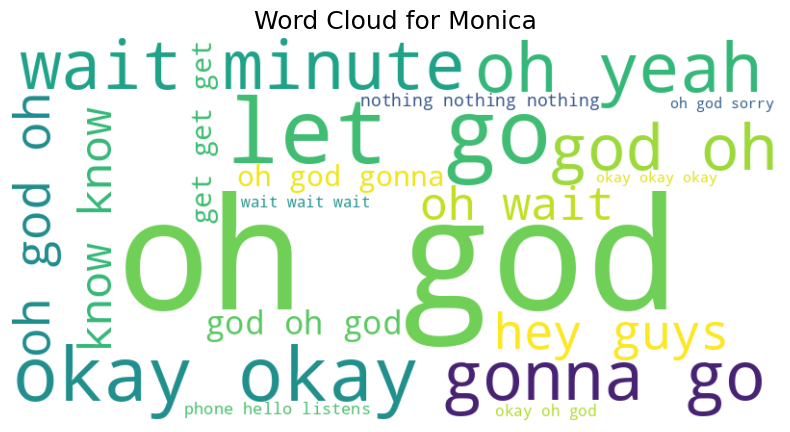

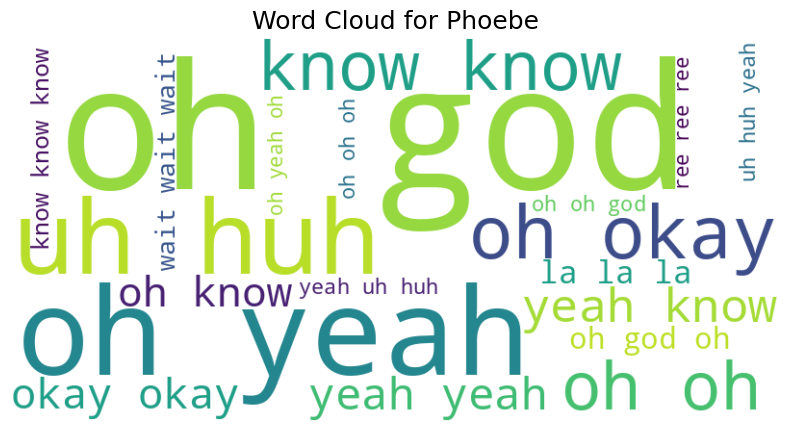

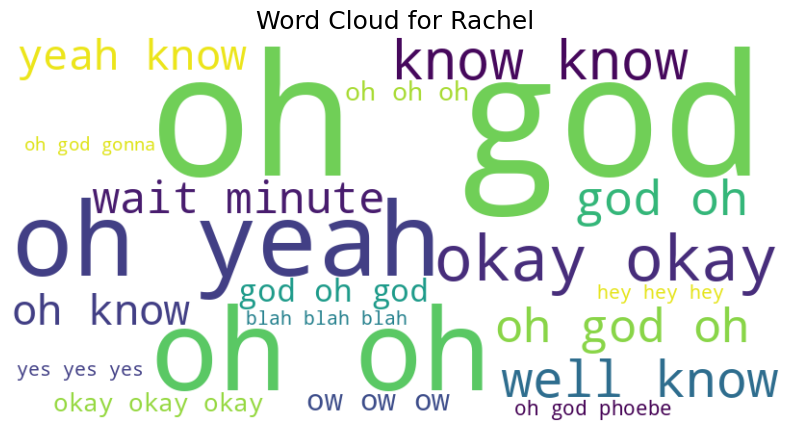

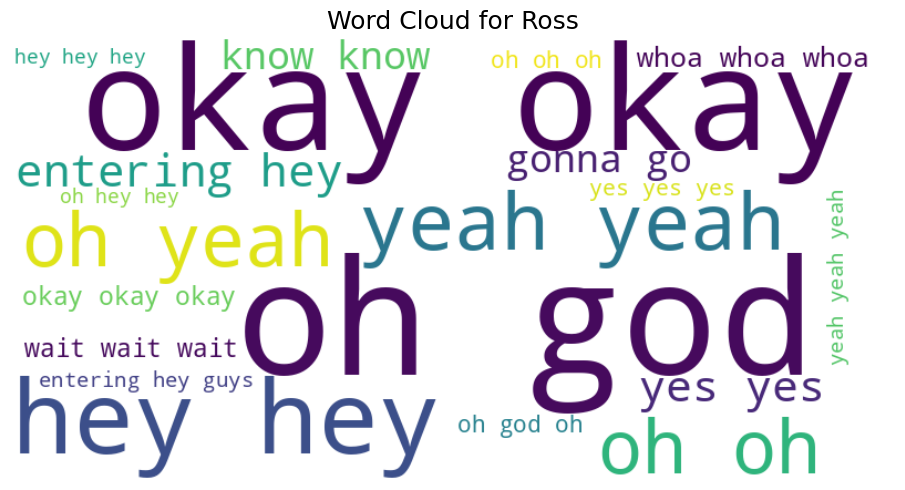

In [16]:
# Function to generate word cloud
def generate_wordcloud(ngram_counts, title):
    # Combine the words and counts into a single string for the word cloud
    word_freq = { ' '.join(k): v for k, v in ngram_counts.items() }
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Plotting the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')

# Generate and display word clouds for each friend
for friend in sorted(data['category'].unique()):
    # Combine bigrams and trigrams for the word cloud
    combined_ngrams = bigrams_by_friend[friend] + trigrams_by_friend[friend]
    generate_wordcloud(dict(combined_ngrams), f'Word Cloud for {friend}')
    #just bigrams:
    #generate_wordcloud(dict(bigrams_by_friend[friend]), f'Word Cloud for {friend}')

plt.tight_layout()
plt.show()